# Naive Bayes' Classifier
## Emre Can Açıkgöz
### November 23, 2020

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

def safelog(x):
    return(np.log(x + 1e-100))

# Step1: Collect Dataset

In [2]:
# Import the Dataset
X = np.genfromtxt("data_set_images.csv", delimiter = ",").astype(int)
y0 = np.genfromtxt("data_set_labels.csv", delimiter = ",", dtype = "str")

# Data Cleaning for extra ('') punctuations
y1=[]
for i in y0:
    y1.append(i.strip('"'))

# Convert str data into int 1 to 5
y2 = np.asarray(y1)
y = np.asarray([ord(ch) - ord('A') + 1 for ch in y2])

K = np.max(y)

# Step2: Create Training Set and Test Set

In [3]:
# Divide data set by assigning first 25 to Training Set and remaining 14 to Test Set

# For Class A
X1_Train = X[:25]
y1_Train = y[:25]
X1_Test = X[25:39]
y1_Test = y[25:39]

# For Class B
X2_Train = X[39:64]
y2_Train = y[39:64]
X2_Test = X[64:78]
y2_Test = y[64:78]

# For Class C
X3_Train = X[78:103]
y3_Train = y[78:103]
X3_Test = X[103:117]
y3_Test = y[103:117]

# For Class D
X4_Train = X[117:142]
y4_Train = y[117:142]
X4_Test = X[142:156]
y4_Test = y[142:156]

# For Class E
X5_Train = X[156:181]
y5_Train = y[156:181]
X5_Test = X[181:195]
y5_Test = y[181:195]

# Stack Training Data
X_Train = np.vstack((X1_Train, X2_Train, X3_Train, X4_Train, X5_Train))
y_Train = np.hstack((y1_Train, y2_Train, y3_Train, y4_Train, y5_Train))

# Stack Test Data
X_Test = np.vstack((X1_Test, X2_Test, X3_Test, X4_Test, X5_Test))
y_Test = np.hstack((y1_Test, y2_Test, y3_Test, y4_Test, y5_Test))

# Step3: Estimate Parameters

In [4]:
# Calculate Prior Probabilities
class_priors = [np.mean(y == (c + 1)) for c in range(K)]
class_priors

[0.2, 0.2, 0.2, 0.2, 0.2]

In [5]:
# Class Densities Individual
p1 = [np.mean(X1_Train[:,i]) for i in range(320)]
p2 = [np.mean(X2_Train[:,i]) for i in range(320)]
p3 = [np.mean(X3_Train[:,i]) for i in range(320)]
p4 = [np.mean(X4_Train[:,i]) for i in range(320)]
p5 = [np.mean(X5_Train[:,i]) for i in range(320)]
print(np.array(p1).shape)
print(np.array(p2).shape)
print(np.array(p3).shape)
print(np.array(p4).shape)
print(np.array(p5).shape)

(320,)
(320,)
(320,)
(320,)
(320,)


In [6]:
# Class Densities
P = np.vstack((p1,p2,p3,p4,p5))
print(P)

[[0.   0.   0.   ... 0.68 0.68 0.64]
 [0.04 0.24 0.24 ... 0.8  0.56 0.24]
 [0.   0.   0.   ... 0.6  0.88 0.8 ]
 [0.12 0.44 0.4  ... 0.28 0.16 0.08]
 [0.   0.12 0.12 ... 0.32 0.48 0.44]]


# Step4: Draw Parameter Estimations as Images

In [7]:
# Make Pixels Size of 20x16
p1_img = np.array(p1).reshape(16,20)
p2_img = np.array(p2).reshape(16,20)
p3_img = np.array(p3).reshape(16,20)
p4_img = np.array(p4).reshape(16,20)
p5_img = np.array(p5).reshape(16,20)

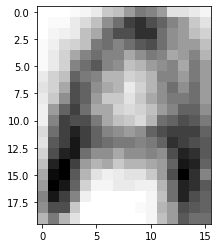

In [8]:
# Image for Class A
plt.imshow(p1_img.T, 'Greys');

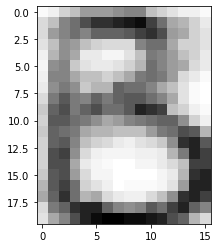

In [9]:
# Image for Class B
plt.imshow(p2_img.T, 'Greys');

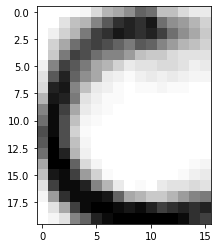

In [10]:
# Image for Class C
plt.imshow(p3_img.T, 'Greys');

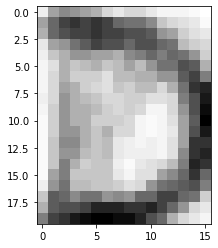

In [11]:
# Image for Class D
plt.imshow(p4_img.T, 'Greys');

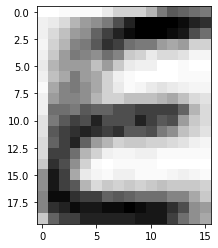

In [12]:
# Image for Class E
plt.imshow(p5_img.T, 'Greys');

# Step5: Calculate the Confusion Matrix for Training Set

\begin{align*}
g_{i}(x) = \log p(x | C_i) + \log P(C_i)\\
g_{i}(x) =\sum\limits_{j} \left[ x_{j}\log p_{ij}+ (1 - x_{j}) \log(1 - {p}_{ij}) \right] + \log P(C_i)
\end{align*}

In [13]:
# Discriminant Function for Class A
g_Train10=[]
g_Train11=[]
g_Train12=[]
g_Train13=[]
g_Train14=[]
for i in range(25):
    g_Train10.append(np.sum([(X1_Train[i][j]*safelog(p1[j]) + (1-X1_Train[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Train11.append(np.sum([(X1_Train[i][j]*safelog(p2[j]) + (1-X1_Train[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Train12.append(np.sum([(X1_Train[i][j]*safelog(p3[j]) + (1-X1_Train[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Train13.append(np.sum([(X1_Train[i][j]*safelog(p4[j]) + (1-X1_Train[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Train14.append(np.sum([(X1_Train[i][j]*safelog(p5[j]) + (1-X1_Train[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g1_Train=np.stack((g_Train10, g_Train11, g_Train12, g_Train13, g_Train14)).T

# Discriminant Function for Class B
g_Train20=[]
g_Train21=[]
g_Train22=[]
g_Train23=[]
g_Train24=[]
for i in range(25):
    g_Train20.append(np.sum([(X2_Train[i][j]*safelog(p1[j]) + (1-X2_Train[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Train21.append(np.sum([(X2_Train[i][j]*safelog(p2[j]) + (1-X2_Train[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Train22.append(np.sum([(X2_Train[i][j]*safelog(p3[j]) + (1-X2_Train[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Train23.append(np.sum([(X2_Train[i][j]*safelog(p4[j]) + (1-X2_Train[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Train24.append(np.sum([(X2_Train[i][j]*safelog(p5[j]) + (1-X2_Train[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g2_Train = np.vstack((g_Train20, g_Train21, g_Train22, g_Train23, g_Train24)).T

# Discriminant Function for Class C
g_Train30=[]
g_Train31=[]
g_Train32=[]
g_Train33=[]
g_Train34=[]
for i in range(25):
    g_Train30.append(np.sum([(X3_Train[i][j]*safelog(p1[j]) + (1-X3_Train[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Train31.append(np.sum([(X3_Train[i][j]*safelog(p2[j]) + (1-X3_Train[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Train32.append(np.sum([(X3_Train[i][j]*safelog(p3[j]) + (1-X3_Train[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Train33.append(np.sum([(X3_Train[i][j]*safelog(p4[j]) + (1-X3_Train[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Train34.append(np.sum([(X3_Train[i][j]*safelog(p5[j]) + (1-X3_Train[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g3_Train = np.vstack((g_Train30, g_Train31, g_Train32, g_Train33, g_Train34)).T

# Discriminant Function for Class D
g_Train40=[]
g_Train41=[]
g_Train42=[]
g_Train43=[]
g_Train44=[]
for i in range(25):
    g_Train40.append(np.sum([(X4_Train[i][j]*safelog(p1[j]) + (1-X4_Train[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Train41.append(np.sum([(X4_Train[i][j]*safelog(p2[j]) + (1-X4_Train[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Train42.append(np.sum([(X4_Train[i][j]*safelog(p3[j]) + (1-X4_Train[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Train43.append(np.sum([(X4_Train[i][j]*safelog(p4[j]) + (1-X4_Train[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Train44.append(np.sum([(X4_Train[i][j]*safelog(p5[j]) + (1-X4_Train[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g4_Train = np.vstack((g_Train40, g_Train41, g_Train42, g_Train43, g_Train44)).T

# Discriminant Function for Class E
g_Train50=[]
g_Train51=[]
g_Train52=[]
g_Train53=[]
g_Train54=[]
for i in range(25):
    g_Train50.append(np.sum([(X5_Train[i][j]*safelog(p1[j]) + (1-X5_Train[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Train51.append(np.sum([(X5_Train[i][j]*safelog(p2[j]) + (1-X5_Train[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Train52.append(np.sum([(X5_Train[i][j]*safelog(p3[j]) + (1-X5_Train[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Train53.append(np.sum([(X5_Train[i][j]*safelog(p4[j]) + (1-X5_Train[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Train54.append(np.sum([(X5_Train[i][j]*safelog(p5[j]) + (1-X5_Train[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g5_Train = np.vstack((g_Train50, g_Train51, g_Train52, g_Train53, g_Train54)).T

# Stack Different Class Sets
y_hat1 = np.vstack((g1_Train, g2_Train, g3_Train, g4_Train, g5_Train))
y_hat1.shape

(125, 5)

In [14]:
# Confusion Matrix for Training Data
y_predicted1 = np.argmax(y_hat1, axis=1)
confusion_matrix = pd.crosstab(y_predicted1, y_Train, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train       1   2   3   4   5
y_predicted                    
0            25   0   0   0   0
1             0  24   1   0   1
2             0   0  24   0   0
3             0   1   0  25   0
4             0   0   0   0  24


# Step6: Calculate the Confusion Matrix for Test Set

In [15]:
# Discriminant Function for Class A
g_Test10=[]
g_Test11=[]
g_Test12=[]
g_Test13=[]
g_Test14=[]
for i in range(14):
    g_Test10.append(np.sum([(X1_Test[i][j]*safelog(p1[j]) + (1-X1_Test[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Test11.append(np.sum([(X1_Test[i][j]*safelog(p2[j]) + (1-X1_Test[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Test12.append(np.sum([(X1_Test[i][j]*safelog(p3[j]) + (1-X1_Test[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Test13.append(np.sum([(X1_Test[i][j]*safelog(p4[j]) + (1-X1_Test[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Test14.append(np.sum([(X1_Test[i][j]*safelog(p5[j]) + (1-X1_Test[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g1_Test=np.stack((g_Test10, g_Test11, g_Test12, g_Test13, g_Test14)).T

# Discriminant Function for Class B
g_Test20=[]
g_Test21=[]
g_Test22=[]
g_Test23=[]
g_Test24=[]
for i in range(14):
    g_Test20.append(np.sum([(X2_Test[i][j]*safelog(p1[j]) + (1-X2_Test[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Test21.append(np.sum([(X2_Test[i][j]*safelog(p2[j]) + (1-X2_Test[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Test22.append(np.sum([(X2_Test[i][j]*safelog(p3[j]) + (1-X2_Test[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Test23.append(np.sum([(X2_Test[i][j]*safelog(p4[j]) + (1-X2_Test[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Test24.append(np.sum([(X2_Test[i][j]*safelog(p5[j]) + (1-X2_Test[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g2_Test = np.vstack((g_Test20, g_Test21, g_Test22, g_Test23, g_Test24)).T

# Discriminant Function for Class C
g_Test30=[]
g_Test31=[]
g_Test32=[]
g_Test33=[]
g_Test34=[]
for i in range(14):
    g_Test30.append(np.sum([(X3_Test[i][j]*safelog(p1[j]) + (1-X3_Test[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Test31.append(np.sum([(X3_Test[i][j]*safelog(p2[j]) + (1-X3_Test[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Test32.append(np.sum([(X3_Test[i][j]*safelog(p3[j]) + (1-X3_Test[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Test33.append(np.sum([(X3_Test[i][j]*safelog(p4[j]) + (1-X3_Test[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Test34.append(np.sum([(X3_Test[i][j]*safelog(p5[j]) + (1-X3_Test[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g3_Test = np.vstack((g_Test30, g_Test31, g_Test32, g_Test33, g_Test34)).T

# Discriminant Function for Class D
g_Test40=[]
g_Test41=[]
g_Test42=[]
g_Test43=[]
g_Test44=[]
for i in range(14):
    g_Test40.append(np.sum([(X4_Test[i][j]*safelog(p1[j]) + (1-X4_Test[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Test41.append(np.sum([(X4_Test[i][j]*safelog(p2[j]) + (1-X4_Test[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Test42.append(np.sum([(X4_Test[i][j]*safelog(p3[j]) + (1-X4_Test[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Test43.append(np.sum([(X4_Test[i][j]*safelog(p4[j]) + (1-X4_Test[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Test44.append(np.sum([(X4_Test[i][j]*safelog(p5[j]) + (1-X4_Test[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g4_Test = np.vstack((g_Test40, g_Test41, g_Test42, g_Test43, g_Test44)).T

# Discriminant Function for Class E
g_Test50=[]
g_Test51=[]
g_Test52=[]
g_Test53=[]
g_Test54=[]
for i in range(14):
    g_Test50.append(np.sum([(X5_Test[i][j]*safelog(p1[j]) + (1-X5_Test[i][j])*safelog(1-p1[j])) for j in range(320)]))
    g_Test51.append(np.sum([(X5_Test[i][j]*safelog(p2[j]) + (1-X5_Test[i][j])*safelog(1-p2[j])) for j in range(320)]))
    g_Test52.append(np.sum([(X5_Test[i][j]*safelog(p3[j]) + (1-X5_Test[i][j])*safelog(1-p3[j])) for j in range(320)]))
    g_Test53.append(np.sum([(X5_Test[i][j]*safelog(p4[j]) + (1-X5_Test[i][j])*safelog(1-p4[j])) for j in range(320)]))
    g_Test54.append(np.sum([(X5_Test[i][j]*safelog(p5[j]) + (1-X5_Test[i][j])*safelog(1-p5[j])) for j in range(320)]))
    
g5_Test = np.vstack((g_Test50, g_Test51, g_Test52, g_Test53, g_Test54)).T

# Stack Different Class Sets
y_hat2 = np.vstack((g1_Test, g2_Test, g3_Test, g4_Test, g5_Test))
y_hat2.shape

(70, 5)

In [16]:
# Confusion Matrix for Test Data
y_predicted2 = np.argmax(y_hat2, axis=1)
confusion_matrix = pd.crosstab(y_predicted2, y_Test, rownames = ['y_predicted'], colnames = ['y_test'])
print(confusion_matrix)

y_test       1   2  3   4   5
y_predicted                  
0            7   0  0   0   0
1            0  11  3   2   4
2            0   0  7   0   0
3            7   3  3  12   0
4            0   0  1   0  10
